In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/student_info.csv')

In [3]:
df.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [4]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
df['study_hours']=df['study_hours'].fillna(df['study_hours'].median())

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,study_hours,student_marks
count,200.00000,200.00000
mean,6.99905,77.93375
std,1.23737,4.92570
min,5.01000,68.57000
25%,5.79000,73.38500
50%,7.12000,77.71000
75%,8.07250,82.32000
max,8.99000,86.99000


<Axes: >

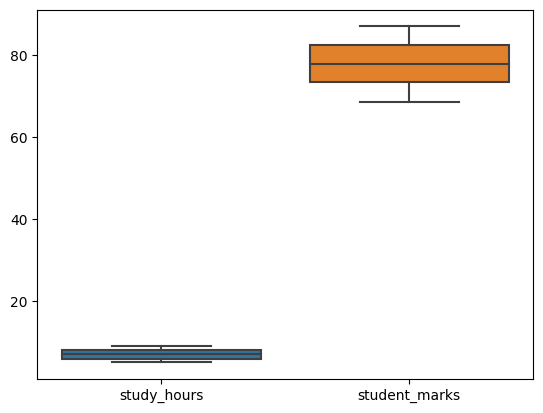

In [10]:
sns.boxplot(data=df)

<Axes: >

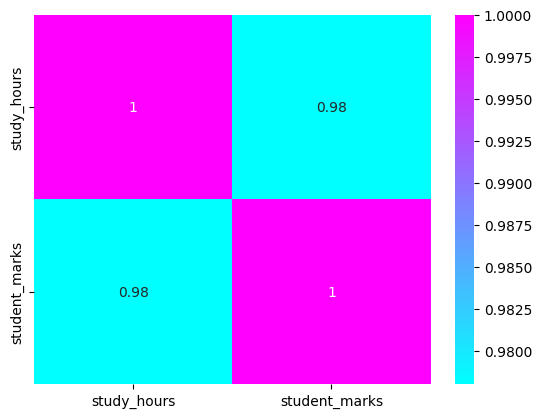

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

<Axes: xlabel='study_hours', ylabel='student_marks'>

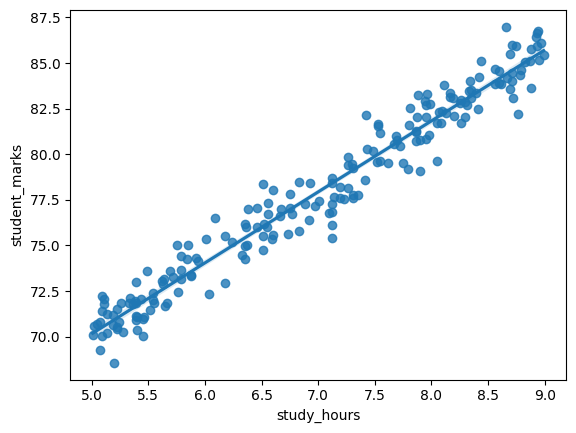

In [14]:
sns.regplot(x='study_hours',y='student_marks',data=df)

<ipython-input-16-cf0f1f42d73e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['student_marks'])


<Axes: xlabel='student_marks', ylabel='Density'>

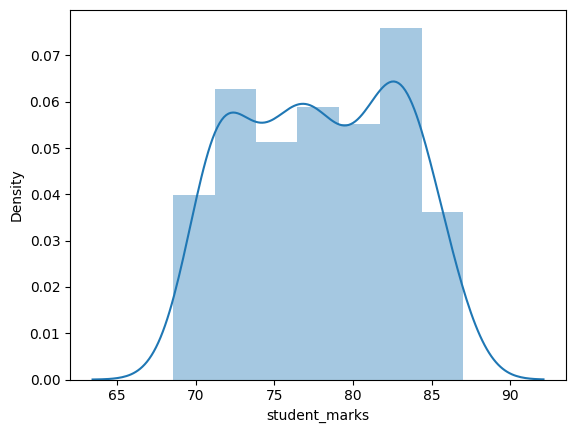

In [16]:
sns.distplot(df['student_marks'])

<ipython-input-17-eb16bd11e036>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['study_hours'])


<Axes: xlabel='study_hours', ylabel='Density'>

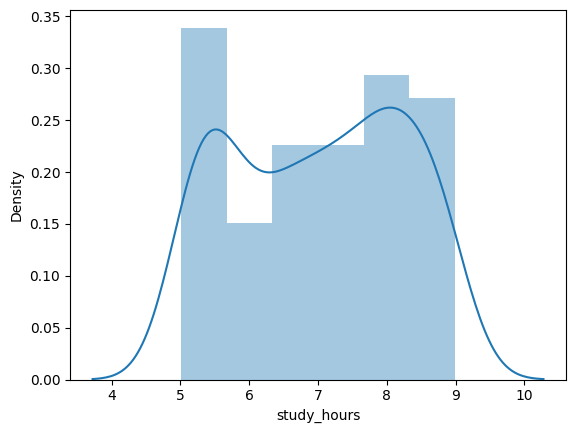

In [17]:
sns.distplot(df['study_hours'])

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [19]:
df1.head()

,study_hours,student_marks
0,-0.136963,0.115247
1,-0.355715,-0.242960
2,0.097993,0.151881
3,-1.076788,-1.244309
4,1.353793,1.273311


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
X=df.drop(columns='student_marks',axis=1)
Y=df['student_marks']

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,Y)

array([0.94270988, 0.95775594, 0.94052742, 0.96146521, 0.9630364 ])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

# Create the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(Y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 1.4921972959807406


In [27]:
from sklearn.metrics import r2_score

# Create the SVR model and train on the data
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)

# Make predictions on the data
y_pred = svr.predict(X_test)

# Compute the R2 score
r2 = r2_score(Y_test, y_pred)
print('R2 score:', r2)


R2 score: 0.9381432565043318
